In [30]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString


class Map:
    def __init__(self, obstacles: list):
        self.obstacles = obstacles
        self.xmin, self.ymin, self.xmax, self.ymax = self.get_map_boundry()
        print("$$ Map range:", self.xmin, self.ymin, self.xmax, self.ymax)

    def get_lines(self):
        lines = []
        for obstacle in self.obstacles:
            lines.append(
                [
                    obstacle["top_right"],
                    obstacle["down_right"],
                ]
            )
            lines.append(
                [
                    obstacle["down_right"],
                    obstacle["down_left"],
                ]
            )
            lines.append(
                [
                    obstacle["down_left"],
                    obstacle["top_left"],
                ]
            )
            lines.append(
                [
                    obstacle["top_left"],
                    obstacle["top_right"],
                ]
            )
        return lines


    def collision_check(self, x, y):
        point = Point(x, y)
        for obst in self.obstacles:
            point1 = obst["top_right"]
            point2 = obst["down_right"]
            point3 = obst["down_left"]
            point4 = obst["top_left"]
            poly = Polygon([point1, point2, point3, point4])
            if point.within(poly) or poly.touches(point):
                return True
        return False

    def get_map_boundry(self):
        x = []
        y = []
        for obst in self.obstacles:
            for point_name in obst:
                point = obst[point_name]
                x.append(point[0])
                y.append(point[1])
        return min(x), min(y), max(x), max(y)

    def point_in_map(self, x, y):
        return x < self.xmax and x > self.xmin and y < self.ymax and y > self.ymin

    def valid_point(self, x, y):
        return (not self.collision_check(x, y)) and (self.point_in_map(x, y))

    def find_intersection(self, point_1, point_2, point_3, point_4):
        line1 = LineString([tuple(point_1), tuple(point_2)])
        line2 = LineString([tuple(point_3), tuple(point_4)])
        intersection = line1.intersection(line2)
        return intersection

    def find_closest_intersection(self, x1, y1, x2, y2):
        min_distance = 0.4
        for line in self.get_lines():
            intersection = self.find_intersection((x1, y1), (x2, y2), line[0], line[1])
            if intersection:
                distance = np.sqrt(
                    (intersection.x - x1) ** 2 + (intersection.y - y1) ** 2
                )
                min_distance = min(min_distance, distance)
        return min_distance
    
    def plot_map(self):
        plt.figure(figsize=(8, 8))
        for obstacle in self.obstacles:
            line1 = [
                [obstacle["top_right"][0], obstacle["down_right"][0]],
                [obstacle["top_right"][1], obstacle["down_right"][1]],
            ]
            line2 = [
                [obstacle["down_right"][0], obstacle["down_left"][0]],
                [obstacle["down_right"][1], obstacle["down_left"][1]],
            ]
            line3 = [
                [obstacle["down_left"][0], obstacle["top_left"][0]],
                [obstacle["down_left"][1], obstacle["top_left"][1]],
            ]
            line4 = [
                [obstacle["top_left"][0], obstacle["top_right"][0]],
                [obstacle["top_left"][1], obstacle["top_right"][1]],
            ]

            for line in [line1, line2, line3, line4]:
                plt.plot(line[0], line[1], c="black")
                plt.fill(
                    "i",
                    "j",
                    facecolor="gray",
                    edgecolor="gray",
                    linewidth=1,
                    data={
                        "i": [line1[0], line2[0], line3[0], line4[0]],
                        "j": [line1[1], line2[1], line3[1], line4[1]],
                    },
                )

In [31]:
alpha = 0.016

obstacle1 = {
    "top_right": [0.69 + 2 * alpha, 0.74 + alpha],
    "top_left": [0.0, 0.74 + alpha],
    "down_right": [0.69 + 2 * alpha, 0.74],
    "down_left": [0.0, 0.74],
}

obstacle2 = {
    "top_right": [0.0, 0.74],
    "top_left": [-alpha, 0.74],
    "down_right": [0.0, 0.0],
    "down_left": [-alpha, 0.0],
}

obstacle3 = {
    "top_right": [0.69 + 2 * alpha, 0.0],
    "top_left": [0.0, 0.0],
    "down_right": [0.69 + 2 * alpha, -alpha],
    "down_left": [0.0, -alpha],
}

obstacle4 = {
    "top_right": [0.69 + 3 * alpha, 0.74],
    "top_left": [0.69 + 2 * alpha, 0.74],
    "down_right": [0.69 + 3 * alpha, 0.0],
    "down_left": [0.69 + 2 * alpha, 0.0],
}

obstacle5 = {
    "top_right": [0.24 + alpha, 0.2],
    "top_left": [0.24, 0.2],
    "down_right": [0.24 + alpha, 0.0],
    "down_left": [0.24, 0.0],
}
obstacle6 = {
    "top_right": [0.45 + 2 * alpha, 0.2],
    "top_left": [0.45 + alpha, 0.2],
    "down_right": [0.45 + 2 * alpha, 0.0],
    "down_left": [0.45 + alpha, 0.0],
}
obstacle7 = {
    "top_right": [0.29 + alpha, 0.74],
    "top_left": [0.29, 0.74],
    "down_right": [0.29 + alpha, 0.74 - 0.295],
    "down_left": [0.29, 0.74 - 0.295],
}
obstacle8 = {
    "top_right": [0.58 + alpha, 0.74 - 0.295],
    "top_left": [0.2, 0.74 - 0.295],
    "down_right": [0.58 + alpha, 0.74 - 0.295 - alpha],
    "down_left": [0.2, 0.74 - 0.295 - alpha],
}

obstacles = [
    obstacle1,
    obstacle2,
    obstacle3,
    obstacle4,
    obstacle5,
    obstacle6,
    obstacle7,
    obstacle8,
]

$$ Map range: -0.016 -0.016 0.738 0.756


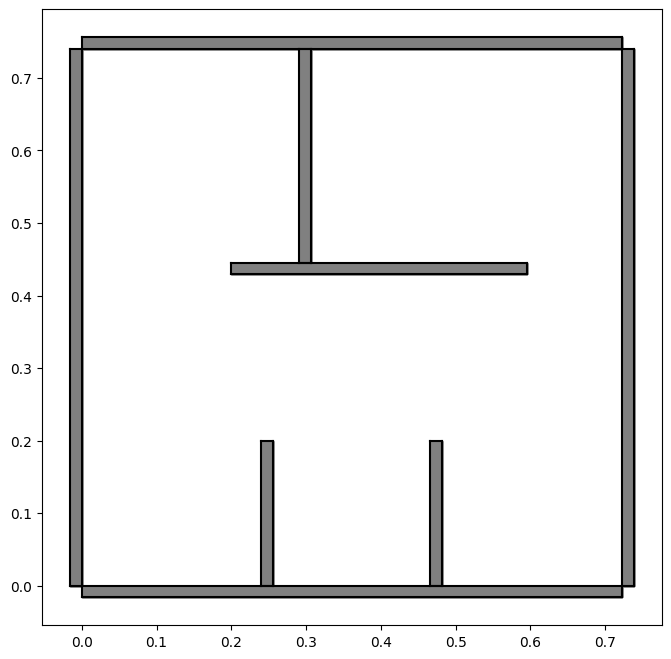

In [32]:
map = Map(obstacles=obstacles)
map.plot_map()